In [1]:
import pandas as pd

In [2]:
life_ex = pd.read_csv('data/API_SP.DYN.LE00.IN_DS2_en_csv_v2_5358385.csv', skiprows=4)
health_ex = pd.read_csv('data/API_SH.XPD.CHEX.PC.CD_DS2_en_csv_v2_5359940.csv', skiprows=4)

In [3]:
life_ex.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,64.152,64.537,64.752,65.132,65.294,65.502,...,75.636,75.601,75.683,75.617,75.903,76.072,76.248,75.723,NaN,NaN


In [4]:
health_ex.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Only keep columns for life_ex: Country Name, 2019
life_ex = life_ex[['Country Name', '2019']]
life_ex

,Country Name,2019
0,Aruba,76.248000
1,Africa Eastern and Southern,63.755674
2,Afghanistan,63.565000
3,Africa Western and Central,57.555796
4,Angola,62.448000
...,...,...
261,Kosovo,79.022000
262,"Yemen, Rep.",65.092000
263,South Africa,66.175000
264,Zambia,62.793000


In [6]:
# Only keep columns for life_ex: Country Name, 2019
health_ex = health_ex[['Country Name', '2019']]
health_ex

,Country Name,2019
0,Aruba,NaN
1,Africa Eastern and Southern,91.078351
2,Afghanistan,65.806030
3,Africa Western and Central,61.362172
4,Angola,71.326004
...,...,...
261,Kosovo,NaN
262,"Yemen, Rep.",NaN
263,South Africa,546.688416
264,Zambia,69.324379


In [7]:
# add new column in health_ex with life expectancy
health_ex['Life Expectancy at Birth (total years)'] = life_ex['2019']
health_ex

,Country Name,2019,Life Expectancy at Birth (total years)
0,Aruba,NaN,76.248000
1,Africa Eastern and Southern,91.078351,63.755674
2,Afghanistan,65.806030,63.565000
3,Africa Western and Central,61.362172,57.555796
4,Angola,71.326004,62.448000
...,...,...,...
261,Kosovo,NaN,79.022000
262,"Yemen, Rep.",NaN,65.092000
263,South Africa,546.688416,66.175000
264,Zambia,69.324379,62.793000


In [8]:
# rename 2019 column to Health Expenditure per Capita (current US$)
health_ex.rename(columns={'2019': 'Health Expenditure per Capita (current US$)'}, inplace=True)
health_ex

,Country Name,Health Expenditure per Capita (current US$),Life Expectancy at Birth (total years)
0,Aruba,NaN,76.248000
1,Africa Eastern and Southern,91.078351,63.755674
2,Afghanistan,65.806030,63.565000
3,Africa Western and Central,61.362172,57.555796
4,Angola,71.326004,62.448000
...,...,...,...
261,Kosovo,NaN,79.022000
262,"Yemen, Rep.",NaN,65.092000
263,South Africa,546.688416,66.175000
264,Zambia,69.324379,62.793000


In [9]:
# Drop nans
health_ex.dropna(inplace=True)



# sort by Health Expenditure per Capita (current US$)
health_ex.sort_values(by='Health Expenditure per Capita (current US$)', ascending = False, inplace=True)

# reset index
health_ex.reset_index(drop=True, inplace=True)

health_ex

,Country Name,Health Expenditure per Capita (current US$),Life Expectancy at Birth (total years)
0,United States,10921.012695,78.787805
1,North America,10317.570019,79.123365
2,Switzerland,9666.337891,83.904878
3,Norway,8007.397949,82.958537
4,Iceland,6274.959473,83.163415
...,...,...,...
221,Eritrea,25.267935,67.300000
222,South Sudan,22.638187,55.912000
223,"Congo, Dem. Rep.",20.570732,60.276000
224,Burundi,20.567541,62.351000


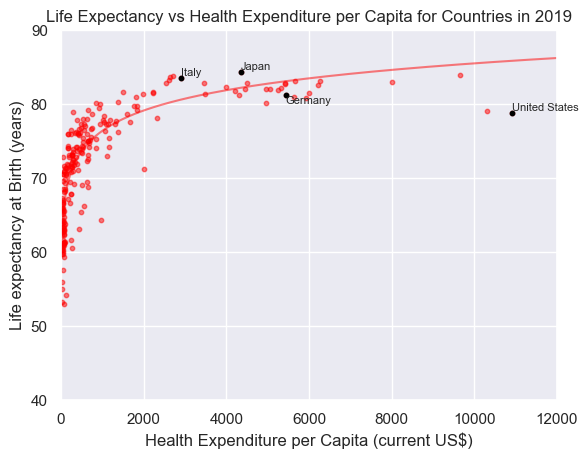

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.linear_model import LinearRegression
sns.set_theme()


# conditional plot for the year 2020
df_2020 = health_ex
plt.scatter(data=df_2020, x='Health Expenditure per Capita (current US$)', y='Life Expectancy at Birth (total years)', c='red', marker='o', s=10, alpha=0.5, label='2019')
# fit a linear model between log GDP and life expectancy
reg = LinearRegression().fit(np.log(df_2020['Health Expenditure per Capita (current US$)']).values.reshape(-1, 1), df_2020['Life Expectancy at Birth (total years)'].values.reshape(-1, 1))
# plot the linear model
x = np.linspace(start=4, stop=12, num=100)
y = reg.coef_[0][0] * x + reg.intercept_[0]
# Use a red color to symbolize health expenditure
plt.plot(np.exp(x), y, alpha=0.5, c='red')

# annotate Japan with country name, make point bigger

for row in df_2020.index:
    if df_2020.loc[row, 'Country Name'] in ['Japan', 'Germany', 'Italy', 'United States']:
        plt.scatter(data=df_2020.loc[row, :], x='Health Expenditure per Capita (current US$)', y='Life Expectancy at Birth (total years)', c='black', marker='o', s=10, alpha=1)
        plt.text(x=df_2020.loc[row, 'Health Expenditure per Capita (current US$)'] + 0.2, y=df_2020.loc[row, 'Life Expectancy at Birth (total years)'] + 0.3 - 1.6*(df_2020.loc[row, 'Country Name'] == 'Germany'), s=df_2020.loc[row, 'Country Name'], fontsize=8)

# plt.legend(title='Year')  
plt.title('Life Expectancy vs Health Expenditure per Capita for Countries in 2019')
# plt.xscale('log')
# make y axis go from 0 to 100
plt.ylim(40, 90)
plt.xlim(0, 12000)
plt.xlabel('Health Expenditure per Capita (current US$)')
plt.ylabel('Life expectancy at Birth (years)')
plt.show()

In [75]:
physical_activity = pd.read_csv('data/physical_ac.csv')
# only include data for countries USA, Japan, Germany, Italy

physical_activity = physical_activity[physical_activity['Unnamed: 0'].isin(['United States of America', 'Japan', 'Germany', 'Italy'])]

In [76]:
physical_activity

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Prevalence of insufficient physical activity among adults aged 18+ years (age-standardized estimate) (%),Prevalence of insufficient physical activity among adults aged 18+ years (age-standardized estimate) (%).1,Prevalence of insufficient physical activity among adults aged 18+ years (age-standardized estimate) (%).2,Prevalence of insufficient physical activity among adults aged 18+ years (crude estimate) (%),Prevalence of insufficient physical activity among adults aged 18+ years (crude estimate) (%).1,Prevalence of insufficient physical activity among adults aged 18+ years (crude estimate) (%).2
67,Germany,2016,18+ years,42.2 [35.5-49.2],40.2 [34.0-46.7],44.1 [36.9-51.6],45.8 [39.0-52.8],43.5 [37.2-50.1],48.0 [40.7-55.4]
85,Italy,2016,18+ years,41.4 [34.3-48.8],36.2 [29.9-42.9],46.2 [38.4-54.2],44.8 [37.6-52.2],39.3 [32.8-46.2],49.9 [42.1-57.8]
87,Japan,2016,18+ years,35.5 [20.5-53.8],33.8 [20.1-50.9],37.0 [21.0-56.5],38.1 [22.5-56.5],36.2 [21.8-53.5],39.8 [23.1-59.2]
186,United States of America,2016,18+ years,40.0 [33.0-47.3],31.7 [25.8-38.3],48.0 [40.1-56.1],42.5 [35.4-49.9],33.7 [27.6-40.5],51.0 [43.0-59.0]


In [77]:
# Only include columns Unnamed: 0 and Prevalence of insufficient physical activity among adults aged 18+ years (age-standardized estimate) (%)
physical_activity = physical_activity[['Unnamed: 0', 'Prevalence of insufficient physical activity among adults aged 18+ years (age-standardized estimate) (%)']]
physical_activity


,Unnamed: 0,Prevalence of insufficient physical activity among adults aged 18+ years (age-standardized estimate) (%)
67,Germany,42.2 [35.5-49.2]
85,Italy,41.4 [34.3-48.8]
87,Japan,35.5 [20.5-53.8]
186,United States of America,40.0 [33.0-47.3]


In [78]:
# rename columns to Country Name
physical_activity.rename(columns={'Unnamed: 0': 'Country Name', 'Prevalence of insufficient physical activity among adults aged 18+ years (age-standardized estimate) (%)': 'Prevalence of Insufficient Physical Activity for 18+ Years Adults (age-standardized estimate)'}, inplace=True)

/Users/huayuan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [79]:
physical_activity

,Country Name,Prevalence of Insufficient Physical Activity for 18+ Years Adults (age-standardized estimate)
67,Germany,42.2 [35.5-49.2]
85,Italy,41.4 [34.3-48.8]
87,Japan,35.5 [20.5-53.8]
186,United States of America,40.0 [33.0-47.3]


In [80]:
# In column Prevalence of insufficient physical activity among adults aged 18+ years (age-standardized estimate) (%) remove the 12 last characters
physical_activity['Prevalence of Insufficient Physical Activity for 18+ Years Adults (age-standardized estimate)'] = physical_activity['Prevalence of Insufficient Physical Activity for 18+ Years Adults (age-standardized estimate)'].str[:-12]
physical_activity


<ipython-input-80-ce4f49407b88>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  physical_activity['Prevalence of Insufficient Physical Activity for 18+ Years Adults (age-standardized estimate)'] = physical_activity['Prevalence of Insufficient Physical Activity for 18+ Years Adults (age-standardized estimate)'].str[:-12]


,Country Name,Prevalence of Insufficient Physical Activity for 18+ Years Adults (age-standardized estimate)
67,Germany,42.2
85,Italy,41.4
87,Japan,35.5
186,United States of America,40.0


In [81]:
# In column Prevalence of insufficient physical activity among adults aged 18+ years (age-standardized estimate) (%) convert to float
physical_activity['Prevalence of Insufficient Physical Activity for 18+ Years Adults (age-standardized estimate)'] = physical_activity['Prevalence of Insufficient Physical Activity for 18+ Years Adults (age-standardized estimate)'].astype(float)
physical_activity

<ipython-input-81-c74fc4aa3fcb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  physical_activity['Prevalence of Insufficient Physical Activity for 18+ Years Adults (age-standardized estimate)'] = physical_activity['Prevalence of Insufficient Physical Activity for 18+ Years Adults (age-standardized estimate)'].astype(float)


,Country Name,Prevalence of Insufficient Physical Activity for 18+ Years Adults (age-standardized estimate)
67,Germany,42.2
85,Italy,41.4
87,Japan,35.5
186,United States of America,40.0


In [82]:
# sort by Prevalence of insufficient physical activity among adults aged 18+ years (age-standardized estimate) (%)
physical_activity.sort_values(by='Prevalence of Insufficient Physical Activity for 18+ Years Adults (age-standardized estimate)', ascending = False, inplace=True)

# reset index
physical_activity.reset_index(drop=True, inplace=True)

# Rename united states of america to United States
physical_activity['Country Name'] = physical_activity['Country Name'].str.replace('United States of America', 'United States')

physical_activity


/Users/huayuan/opt/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
<ipython-input-82-6773faac0086>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  physical_activity['Country Name'] = physical_activity['Country Name'].str.replace('United States of America', 'United States')


,Country Name,Prevalence of Insufficient Physical Activity for 18+ Years Adults (age-standardized estimate)
0,Germany,42.2
1,Italy,41.4
2,United States,40.0
3,Japan,35.5


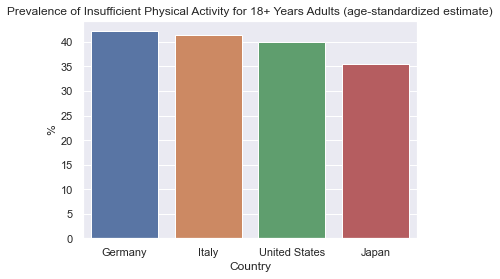

In [84]:
# Make bar plot with countries on x axis and Prevalence of insufficient physical activity among adults aged 18+ years (age-standardized estimate) (%) on y axis in sns theme
sns.barplot(data=physical_activity, x='Country Name', y='Prevalence of Insufficient Physical Activity for 18+ Years Adults (age-standardized estimate)', palette="Blues_r)
plt.title('Prevalence of Insufficient Physical Activity for 18+ Years Adults (age-standardized estimate)')
plt.ylabel('%') 
plt.xlabel('Country')
plt.show()



In [97]:
sui = pd.read_csv('data/sui.csv')

# Only keep the first three columns 
sui = sui.iloc[:, :3]

# drop firs row
sui.drop(0, inplace=True)

sui['Age-standardized suicide rates (per 100 000 population)'] = sui['Age-standardized suicide rates (per 100 000 population)'].str[:4]

sui['Age-standardized suicide rates (per 100 000 population)'] = sui['Age-standardized suicide rates (per 100 000 population)'].astype(float)

sui = sui[sui['Unnamed: 1'] == 'Both sexes']

sui = sui[['Unnamed: 0', 'Age-standardized suicide rates (per 100 000 population)']]

# Only include countries 

sui = sui[sui['Unnamed: 0'].isin(['United States of America', 'Japan', 'Germany', 'Italy'])]

# sort by Prevalence of insufficient physical activity among adults aged 18+ years (age-standardized estimate) (%)
sui.sort_values(by='Age-standardized suicide rates (per 100 000 population)', ascending = False, inplace=True)

# reset index
sui.reset_index(drop=True, inplace=True)

# Rename united states of america to United States
sui['Unnamed: 0'] = sui['Unnamed: 0'].str.replace('United States of America', 'United States')


sui

,Unnamed: 0,Age-standardized suicide rates (per 100 000 population)
0,United States,14.5
1,Japan,12.2
2,Germany,8.3
3,Italy,4.3


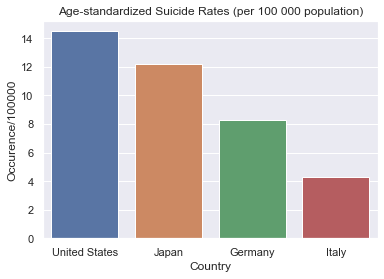

In [101]:
# Make bar plot with countries on x axis and Prevalence of insufficient physical activity among adults aged 18+ years (age-standardized estimate) (%) on y axis in sns theme
sns.barplot(data=sui, x='Unnamed: 0', y='Age-standardized suicide rates (per 100 000 population)', palette="Blues_r)
plt.title('Age-standardized Suicide Rates (per 100 000 population)')
plt.ylabel('Occurence/100000') 
plt.xlabel('Country')
plt.show()

In [119]:
kalo = pd.read_csv('data/daily-per-capita-caloric-supply.csv')

In [120]:
kalo = kalo[kalo['Year']==2018]
kalo

,Entity,Code,Year,Daily caloric supply (OWID based on UN FAO & historical sources)
57,Afghanistan,AFG,2018,2040.000000
115,Africa,NaN,2018,2604.253905
173,Albania,ALB,2018,3360.000000
233,Algeria,DZA,2018,3322.000000
291,Angola,AGO,2018,2385.000000
...,...,...,...,...
9878,Vietnam,VNM,2018,3025.000000
9936,World,OWID_WRL,2018,2928.399523
9994,Yemen,YEM,2018,2154.000000
10053,Zambia,ZMB,2018,2002.000000


In [121]:
kalo = kalo[kalo['Entity'].isin(['United States', 'Japan', 'Germany', 'Italy'])]
kalo

,Entity,Code,Year,Daily caloric supply (OWID based on UN FAO & historical sources)
3344,Germany,DEU,2018,3554.0
4529,Italy,ITA,2018,3503.0
4647,Japan,JPN,2018,2705.0
9559,United States,USA,2018,3782.0


In [122]:
# sort by Prevalence of insufficient physical activity among adults aged 18+ years (age-standardized estimate) (%)
kalo.sort_values(by='Daily caloric supply (OWID based on UN FAO & historical sources)', ascending = False, inplace=True)

# reset index
kalo.reset_index(drop=True, inplace=True)

kalo

/Users/huayuan/opt/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Entity,Code,Year,Daily caloric supply (OWID based on UN FAO & historical sources)
0,United States,USA,2018,3782.0
1,Germany,DEU,2018,3554.0
2,Italy,ITA,2018,3503.0
3,Japan,JPN,2018,2705.0


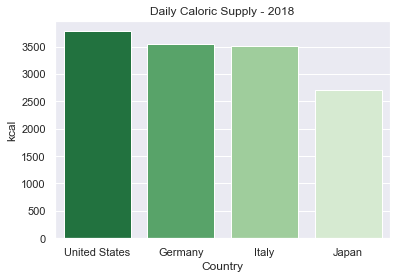

In [124]:
# Make bar plot with countries on x axis and Prevalence of insufficient physical activity among adults aged 18+ years (age-standardized estimate) (%) on y axis in sns theme
sns.barplot(data=kalo, x='Entity', y='Daily caloric supply (OWID based on UN FAO & historical sources)', palette="Greens_r")
plt.title('Daily Caloric Supply - 2018')
plt.ylabel('kcal') 
plt.xlabel('Country')
plt.show()

In [3]:
import pandas as pd
exercise_df = pd.read_csv('data/exercise_dat.csv')
exercise_df

,Country,mu_hours
0,Germany,11.1
1,Italy,3.6
2,United States,6.3
3,Japan,3.3


In [4]:
# sort by mu_hours
exercise_df.sort_values(by='mu_hours', ascending = False, inplace=True)
exercise_df

,Country,mu_hours
0,Germany,11.1
2,United States,6.3
1,Italy,3.6
3,Japan,3.3


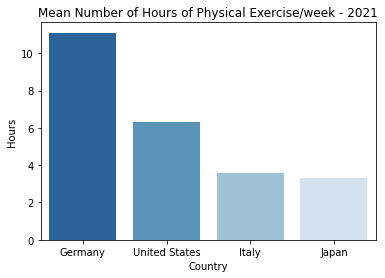

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
# Make bar plot with countries on x axis and Prevalence of insufficient physical activity among adults aged 18+ years (age-standardized estimate) (%) on y axis in sns theme
sns.barplot(data=exercise_df, x='Country', y='mu_hours', palette="Blues_r")
plt.title('Mean Number of Hours of Physical Exercise/week - 2021')
plt.ylabel('Hours') 
plt.xlabel('Country')
plt.show()

In [11]:
obese = pd.read_csv('data/obesity.csv')
obese

,name,slug,value,date_of_information,ranking,region
0,United States,united-states,36.2,2016,12,North America
1,Germany,germany,22.3,2016,79,Europe
2,Italy,italy,19.9,2016,108,Europe
3,Japan,japan,4.3,2016,186,East and Southeast Asia


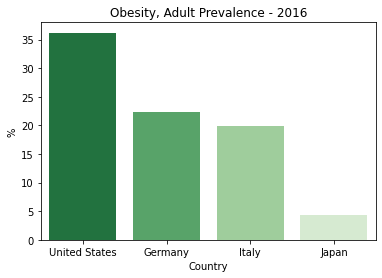

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
# Make bar plot with countries on x axis and Prevalence of insufficient physical activity among adults aged 18+ years (age-standardized estimate) (%) on y axis in sns theme
sns.barplot(data=obese, x='name', y='value', palette="Greens_r")
plt.title('Obesity, Adult Prevalence - 2016')
plt.ylabel('%') 
plt.xlabel('Country')
plt.show()

In [21]:
oldest = pd.read_csv('GDP_data/life_cap.csv')
oldest

,year,age
0,1964,113.641096
1,1965,110.156164
2,1966,110.082192
3,1968,111.484932
4,1969,111.605479
5,1970,112.002740
6,1973,112.698630
7,1975,112.252055
8,1976,113.358904
9,1977,111.498630


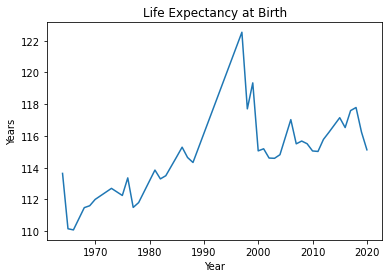

In [22]:
# Make a line plot
sns.lineplot(data=oldest, x='year', y='age')
plt.title('Life Expectancy at Birth')
plt.ylabel('Years')
plt.xlabel('Year')
plt.show()



In [23]:
life_ex_df = pd.read_csv('GDP_data/life_expectancy_by_country.csv')
life_ex_df

,code,region,year,age
0,WLD,World,1964,56.013359
1,WLD,World,1965,55.838022
2,WLD,World,1966,56.372220
3,WLD,World,1967,56.771541
4,WLD,World,1968,57.208288
5,WLD,World,1969,57.518751
6,WLD,World,1970,57.824756
7,WLD,World,1971,57.950919
8,WLD,World,1972,58.786966
9,WLD,World,1973,59.292074


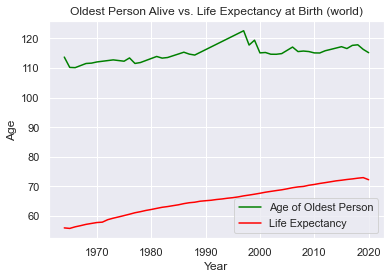

In [31]:
# make line plot in with both lines of oldest and life_ex_df
# set sns theme
sns.set_theme(style="darkgrid")
sns.lineplot(data=oldest, x='year', y='age', color = "green")
sns.lineplot(data=life_ex_df, x='year', y='age', color = "red")
plt.title('Oldest Person Alive vs. Life Expectancy at Birth (world)')
plt.ylabel('Age')
plt.xlabel('Year')
plt.legend(['Age of Oldest Person', 'Life Expectancy'])
plt.show()

ASDASDASD TOP 10 PERCENTILE!


In [1]:
import pandas as pd

time_use = pd.read_excel('data/Time-Use-in-OECD-Countries-OECD.xlsx')

# Only get rows that are USA, Japan, Germany and Italy

time_use = time_use[time_use['Country'].isin(['USA', 'Japan', 'Germany', 'Italy '])]

In [18]:
time_use

,Country,Category,Time (minutes)
8,Germany,Paid work,223.839012
12,Italy,Paid work,148.894552
13,Japan,Paid work,325.711372
29,USA,Paid work,251.137774
41,Germany,Education,24.042137
45,Italy,Education,27.814506
46,Japan,Education,36.980000
62,USA,Education,31.418910
74,Germany,Care for household members,18.901665
78,Italy,Care for household members,26.621509


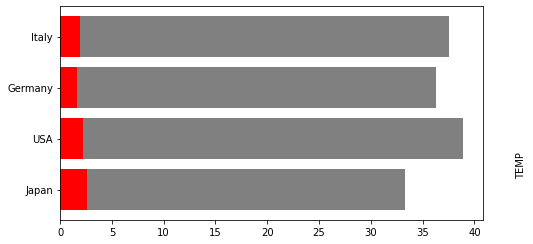

In [2]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

countries = ["Japan", "USA", "Germany", "Italy"]
paid_work = [(325.711372/1440)*100, (251.137774/1440)*100, (223.83901/1440)*100, (148.894552/1440)*100]
education = [(36.980000/1440)*100, (31.418910/1440)*100, (24.042137/1440)*100, (27.814506/1440)*100]
care_for_house_hold_members = [(0.000000/1440)*100, (30.618280/1440)*100, (18.901665/1440)*100, (26.621509/1440)*100]
housework = [(80.370473/1440)*100, (99.900520/1440)*100, (109.354200/1440)*100, (134.714273/1440)*100]
shopping = [(24.928908/1440)*100,(22.013280/1440)*100, (32.090467/1440)*100, (27.742728/1440)*100]
other_paid_volunteer = [(97.724183/1440)*100, (65.190475/1440)*100, (52.598188/1440)*100, (43.145597/1440)*100]
sleep = [(442.020938/1440)*100, (528.019500/1440)*100, (498.381500/1440)*100, (513.320886/1440)*100]
eating_drinking = [(93.454218/1440)*100, (62.747670/1440)*100, (94.963150/1440)*100, (126.974855/1440)*100]
personal_care = [(84.562961/1440)*100, (57.438510/1440)*100, (54.677883/1440)*100, (67.512477/1440)*100]
sports = [(10.222600/1440)*100, (17.946540/1440)*100, (26.435250/1440)*100, (38.214086/1440)*100]
attending_events = [(8.225513/1440)*100, (0/1440)*100, (13.528252/1440)*100, (5.823313/1440)*100]
seeing_friends = [(16.912066/1440)*100, (43.543680/1440)*100, (60.646950/1440)*100, (65.357207/1440)*100]
tv_radio = [(103.224657/1440)*100, (148.308400/1440)*100, (118.465100/1440)*100, (103.692722/1440)*100]
other_leisure = [(147.953249/1440)*100, (73.490920/1440)*100+1, (112.076283/1440)*100, (110.171290/1440)*100]

b1 = plt.barh(countries, paid_work, color="red")

#b2 = plt.barh(countries, education, left=paid_work, color="orange")

b3 = plt.barh(countries, sleep, left=education, color="grey")

plt.text(44, 0.26, 'TEMP', rotation=90)

#b4 = plt.barh(countries, other_paid_volunteer, left=sleep, color="darkgoldenrod")

#b5 = plt.barh(countries, care_for_house_hold_members, left=other_paid_volunteer, color="gold")

#b6 = plt.barh(countries, housework, left=care_for_house_hold_members, color="slateblue")

#b7 = plt.barh(countries, shopping, left=care_for_house_hold_members, color="darkslateblue")

#b8 = plt.barh(countries, personal_care, left=shopping, color="yellow")

#b9 = plt.barh(countries, eating_drinking, left=personal_care, color="green")

#b10 = plt.barh(countries, tv_radio, left=eating_drinking, color="navy")

#b11 = plt.barh(countries, seeing_friends, left=tv_radio, color="darkgray")

#b12 = plt.barh(countries, sports, left=seeing_friends, color="black")

#b13 = plt.barh(countries, attending_events, left=sports, color="darkblue")

#b14 = plt.barh(countries, other_leisure, left=attending_events, color="blue")

#plt.legend([b1, b2, b3, b4, b5, b6, b7, b8, b9, b10, b11, b12, b13, b14], ["Completed", "Pending"], title="Issues", loc="upper right")
#plt.xlim(0, 700)
plt.show()

In [19]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(
    y=["Japan", "USA", "Germany", "Italy"],
    x=[(325.711372/1440)*100, (251.137774/1440)*100, (223.83901/1440)*100, (148.894552/1440)*100],
    name='Paid Work',
    orientation='h',
    marker=dict(
        color='red',
        line=dict(color='red', width=3)
    ), legendrank=14
))
fig.add_trace(go.Bar(
    y=["Japan", "USA", "Germany", "Italy"],
    x=education,
    name='Education',
    orientation='h',
    marker=dict(
        color='orange',
        line=dict(color='orange', width=3)
    ), legendrank=13
))
fig.add_trace(go.Bar(
    y=["Japan", "USA", "Germany", "Italy"],
    x=sleep,
    name='Sleep',
    orientation='h',
    marker=dict(
        color='grey',
        line=dict(color='grey', width=3)
    ), legendrank=12
))
fig.add_trace(go.Bar(
    y=["Japan", "USA", "Germany", "Italy"],
    x=other_paid_volunteer,
    name='Unpaid/volunteer Work',
    orientation='h',
    marker=dict(
        color='darkgoldenrod',
        line=dict(color='darkgoldenrod', width=3)
    ), legendrank=11
))

fig.add_trace(go.Bar(
    y=["Japan", "USA", "Germany", "Italy"],
    x=care_for_house_hold_members,
    name='Care for House Hold Members',
    orientation='h',
    marker=dict(
        color='gold',
        line=dict(color='gold', width=3)
    ), legendrank=10
))
fig.add_trace(go.Bar(
    y=["Japan", "USA", "Germany", "Italy"],
    x=housework,
    name='Housework',
    orientation='h',
    marker=dict(
        color='slateblue',
        line=dict(color='slateblue', width=3)
    ), legendrank=9
))
fig.add_trace(go.Bar(
    y=["Japan", "USA", "Germany", "Italy"],
    x=shopping,
    name='Shopping',
    orientation='h',
    marker=dict(
        color='darkslateblue',
        line=dict(color='darkslateblue', width=3)
    ), legendrank=8
))
fig.add_trace(go.Bar(
    y=["Japan", "USA", "Germany", "Italy"],
    x=personal_care,
    name='Personal Care',
    orientation='h',
    marker=dict(
        color='yellow',
        line=dict(color='yellow', width=3)
    ), legendrank=7
))
fig.add_trace(go.Bar(
    y=["Japan", "USA", "Germany", "Italy"],
    x=eating_drinking,
    name='Eating/Drinking',
    orientation='h',
    marker=dict(
        color='green',
        line=dict(color='green', width=3)
    ), legendrank=6
))
fig.add_trace(go.Bar(
    y=["Japan", "USA", "Germany", "Italy"],
    x=tv_radio,
    name='TV/radio',
    orientation='h',
    marker=dict(
        color='navy',
        line=dict(color='navy', width=3)
    ), legendrank=5
))
fig.add_trace(go.Bar(
    y=["Japan", "USA", "Germany", "Italy"],
    x=seeing_friends,
    name='Seeing Friends',
    orientation='h',
    marker=dict(
        color='darkgray',
        line=dict(color='darkgray', width=3)
    ), legendrank=4
))
fig.add_trace(go.Bar(
    y=["Japan", "USA", "Germany", "Italy"],
    x=sports,
    name='Sports',
    orientation='h',
    marker=dict(
        color='black',
        line=dict(color='black', width=3)
    ), legendrank=3
))
fig.add_trace(go.Bar(
    y=["Japan", "USA", "Germany", "Italy"],
    x=attending_events,
    name='Attending Events',
    orientation='h',
    marker=dict(
        color='skyblue',
        line=dict(color='skyblue', width=3)
    ), legendrank=2
))
fig.add_trace(go.Bar(
    y=["Japan", "USA", "Germany", "Italy"],
    x=other_leisure,
    name='Other Leisure',
    orientation='h',
    marker=dict(
        color='purple',
        line=dict(color='purple', width=3)
    ), legendrank=1
))

# Change text color to white

fig.add_trace(go.Scatter(
    x=[35],
    y=['Japan'],
    mode="text",
    name="Sleep",
    text=["7hr 22min"],
    textposition="middle center",
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=[35],
    y=['USA'],
    mode="text",
    name="Sleep",
    text=["8hr 48min"],
    textposition="middle center",
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=[35],
    y=['Germany'],
    mode="text",
    name="Sleep",
    text=["8hr 18min"],
    textposition="middle center",
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=[35],
    y=['Italy'],
    mode="text",
    name="Sleep",
    text=["8hr 33min"],
    textposition="middle center",
    showlegend=False
))
fig.update_traces(textfont_color='white')

fig.add_trace(go.Scatter(
    x=[7.7],
    y=['Japan'],
    mode="text",
    name="Paid Work",
    text=["326min"],
    textposition="middle center",
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=[7.7],
    y=['USA'],
    mode="text",
    name="Paid Work",
    text=["251min"],
    textposition="middle center",
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=[7.7],
    y=['Germany'],
    mode="text",
    name="Paid Work",
    text=["224min"],
    textposition="middle center",
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=[7.7],
    y=['Italy'],
    mode="text",
    name="Paid Work",
    text=["149min"],
    textposition="middle center",
    showlegend=False
))
fig.update_traces(textfont_color='white')

# Add title
fig.update_layout(
    title_text="How People (15-64) Spend Their Time",
    title_x=0.5,
    title_font=dict(
        size=20,
        color="black"
    )
)

# Set x-axis title
fig.update_xaxes(title_text="% of Day", title_font=dict(size=13, color="black"))

# Set y-axes titles
#fig.update_yaxes(title_text="Country", title_font=dict(size=13, color="black"))


# set x limit of 100
fig.update_layout(xaxis_range=[0, 100])
fig.update_layout(barmode='stack')
fig.update_layout(legend_itemclick=False)
fig.update_layout(legend_itemdoubleclick=False)

fig.write_html("plotly_time_consume_nonf.html")
fig.show()

In [20]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(
    y=["Japan", "USA", "Germany", "Italy"],
    x=[22,58,18,20],
    name='Poultry',
    orientation='h',
    marker=dict(
        color='peru',
        line=dict(color='peru', width=3)
    ), legendrank=6
))
fig.add_trace(go.Bar(
    y=["Japan", "USA", "Germany", "Italy"],
    x=[9.7,37,15,16],
    name='Beef',
    orientation='h',
    marker=dict(
        color='firebrick',
        line=dict(color='firebrick', width=3)
    ), legendrank=5
))
fig.add_trace(go.Bar(
    y=["Japan", "USA", "Germany", "Italy"],
    x=[0.1,0.8,0.83,1.09],
    name='Other Meats',
    orientation='h',
    marker=dict(
        color='darkgray',
        line=dict(color='darkgray', width=3)
    ), legendrank=4
))
fig.add_trace(go.Bar(
    y=["Japan", "USA", "Germany", "Italy"],
    x=[22,30,44,33],
    name='Pork',
    orientation='h',
    marker=dict(
        color='lightpink',
        line=dict(color='lightpink', width=3)
    ), legendrank=3
))

fig.add_trace(go.Bar(
    y=["Japan", "USA", "Germany", "Italy"],
    x=[0.15,0.6,0.97,0.77],
    name='Sheep/goat',
    orientation='h',
    marker=dict(
        color='purple',
        line=dict(color='purple', width=3)
    ), legendrank=2
))
fig.add_trace(go.Bar(
    y=["Japan", "USA", "Germany", "Italy"],
    x=[47,22,13,30],
    name='Seafood',
    orientation='h',
    marker=dict(
        color='steelblue',
        line=dict(color='steelblue', width=3)
    ), legendrank=1
))
fig.add_trace(go.Scatter(
    x=[10],
    y=['Italy'],
    mode="text",
    name="Poultry",
    text=["20"],
    textposition="middle center",
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=[10],
    y=['Germany'],
    mode="text",
    name="Poultry",
    text=["19"],
    textposition="middle center",
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=[10],
    y=['USA'],
    mode="text",
    name="Poultry",
    text=["58"],
    textposition="middle center",
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=[10],
    y=['Japan'],
    mode="text",
    name="Poultry",
    text=["23"],
    textposition="middle center",
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=[77],
    y=['USA'],
    mode="text",
    name="Beef",
    text=["37"],
    textposition="middle center",
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=[26],
    y=['Italy'],
    mode="text",
    name="Beef",
    text=["16"],
    textposition="middle center",
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=[26],
    y=['Germany'],
    mode="text",
    name="Beef",
    text=["15"],
    textposition="middle center",
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=[26],
    y=['Japan'],
    mode="text",
    name="Beef",
    text=["10"],
    textposition="middle center",
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=[110],
    y=['USA'],
    mode="text",
    name="Pork",
    text=["30"],
    textposition="middle center",
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=[45],
    y=['Italy'],
    mode="text",
    name="Pork",
    text=["33"],
    textposition="middle center",
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=[45],
    y=['Germany'],
    mode="text",
    name="Pork",
    text=["44"],
    textposition="middle center",
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=[45],
    y=['Japan'],
    mode="text",
    name="Pork",
    text=["22"],
    textposition="middle center",
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=[85],
    y=['Italy'],
    mode="text",
    name="Seafood",
    text=["30"],
    textposition="middle center",
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=[85],
    y=['Germany'],
    mode="text",
    name="Seafood",
    text=["13"],
    textposition="middle center",
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=[85],
    y=['Japan'],
    mode="text",
    name="Seafood",
    text=["47"],
    textposition="middle center",
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=[138],
    y=['USA'],
    mode="text",
    name="Seafood",
    text=["22"],
    textposition="middle center",
    showlegend=False
))
fig.update_traces(textfont_color='white')


# Add title
fig.update_layout(
    title_text="Per Capita Meat Consumption by Type - 2020",
    title_x=0.5,
    title_font=dict(
        size=20,
        color="black"
    )
)

# Set x-axis title
fig.update_xaxes(title_text="kg per year", title_font=dict(size=13, color="black"))

# Set y-axes titles
#fig.update_yaxes(title_text="Country", title_font=dict(size=13, color="black"))


# set x limit of 100
fig.update_layout(xaxis_range=[0, 149])
fig.update_layout(barmode='stack')
fig.update_layout(legend_itemclick=False)
fig.update_layout(legend_itemdoubleclick=False)
#fig.update_layout(legend_traceorder="reversed")


fig.write_html("plotly_time_consume_meattttttf.html")
fig.show()